# IMPORTING LIBRARIES AND PACKAGES

In [33]:
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from IPython.display import SVG
from sklearn.tree import export_graphviz
from io import StringIO
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from google.colab import drive



drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOADING DATA


In [5]:
df = pd.read_csv("drive/MyDrive/ML_project/census_data.csv", header=None,
                 names=['age',	'workclass',	'fnlwgt',	'education', 'education_num',	'marital_status',	'occupation',
                        'relationship',	'race',	'sex',	'capital_gain',	'capital_loss',	'hours_per_week',	'native_country',	'class'])
tf = pd.read_csv("drive/MyDrive/ML_project/census_test.csv", header=None,
                 names=['age',	'workclass',	'fnlwgt',	'education', 'education_num',	'marital_status',	'occupation',
                        'relationship',	'race',	'sex',	'capital_gain',	'capital_loss',	'hours_per_week',	'native_country',	'class'])

In [6]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [7]:
tf.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


# DATA CLEANING AND PREPROCESSING

In [8]:
df = df.replace(" ?" , np.nan)
tf = tf.replace(" ?" , np.nan)
df = df.fillna(df.mode().iloc[0])
tf = tf.fillna(tf.mode().iloc[0])

In [9]:
df.shape

(32561, 15)

In [10]:
tf.shape

(16281, 15)

In [11]:
df['age'] = pd.cut(df['age'], bins=[16, 35, 60, np.inf], labels=['Young', 'Adult', 'Senior-Citizen'])
tf['age'] = pd.cut(tf['age'], bins=[16, 35, 60, np.inf], labels=['Young', 'Adult', 'Senior-Citizen'])

In [12]:
fnlwgt_bins = [0, 100000, 150000, 200000, 300000, np.inf]
fnlwgt_labels = [0, 1, 2, 3, 4]

# Discretize 'fnlwgt' using custom bins
df['fnlwgt'] = pd.cut(df['fnlwgt'], bins=fnlwgt_bins, labels=fnlwgt_labels)
tf['fnlwgt'] = pd.cut(tf['fnlwgt'], bins=fnlwgt_bins, labels=fnlwgt_labels)

In [13]:
# Adjusting target attribute such that >50=1 and 0 otherwise

df.rename(columns={'class':'target'},inplace=True)
tf.rename(columns={'class':'target'},inplace=True)

df['target']= df['target'].replace(" <=50K", 0)
df['target']= df['target'].replace(" >50K", 1)
# df=df.replace(">50K",'1')

# Adjusting target attribute such that >50=1 and 0 otherwise

tf['target']= tf['target'].replace(" <=50K.",0)
tf['target']= tf['target'].replace(" >50K.",1)
# df['class'] = pd.cut(df['class'], bins=[], labels=capital_gain_labels)

# df.sample(3)
# tf.sample(3)

In [14]:
capital_gain_bins = [0, 1 ,np.inf]
capital_gain_labels = ['0','+ve']

# Discretize 'capital_gain' using custom bins
df['capital_gain'] = pd.cut(df['capital_gain'], bins=capital_gain_bins, labels=capital_gain_labels)
tf['capital_gain'] = pd.cut(tf['capital_gain'], bins=capital_gain_bins, labels=capital_gain_labels)

In [15]:
df['capital_gain'] = df['capital_gain'].astype('category')
df['capital_gain'] = df['capital_gain'].cat.add_categories('NoGain')
df['capital_gain'].fillna('NoGain', inplace=True)

In [16]:
tf['capital_gain'] = tf['capital_gain'].astype('category')
tf['capital_gain'] = tf['capital_gain'].cat.add_categories('NoGain')
tf['capital_gain'].fillna('NoGain', inplace=True)

In [17]:
capital_loss_bins = [0, 1 ,np.inf]
capital_loss_labels = ['0','+ve']

# Discretize 'capital_gain' using custom bins
df['capital_loss'] = pd.cut(df['capital_loss'], bins=capital_loss_bins, labels=capital_loss_labels)
tf['capital_loss'] = pd.cut(tf['capital_loss'], bins=capital_loss_bins, labels=capital_loss_labels)

In [18]:
df['capital_loss'] = df['capital_loss'].astype('category')
df['capital_loss'] = df['capital_loss'].cat.add_categories('Noloss')
df['capital_loss'].fillna('Noloss', inplace=True)

In [19]:
tf['capital_loss'] = tf['capital_loss'].astype('category')
tf['capital_loss'] = tf['capital_loss'].cat.add_categories('Noloss')
tf['capital_loss'].fillna('Noloss', inplace=True)

In [20]:
# df.sample(5)

In [21]:
# tf.sample(5)

In [22]:
df['hours_per_week'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 80, 100], labels=[0, 1, 2, 3, 4])

In [23]:
tf['hours_per_week'] = pd.cut(tf['hours_per_week'], bins=[0, 20, 40, 60, 80, 100], labels=[0, 1, 2, 3, 4])

In [24]:
df.to_csv('df_cleaned_final.csv', index=False)

In [25]:
tf.to_csv('dt_cleaned_final.csv', index=False)

In [26]:
for column in df.columns :
    df[column] = df[column].astype('category')

In [27]:
for column in tf.columns :
    tf[column] = tf[column].astype('category')

In [28]:
q = [df,tf]

In [29]:
result = pd.concat(q)

result.shape

(48842, 15)

In [30]:
# Numerical encoding the features
R_enc = LabelEncoder()
R_final = result.apply(LabelEncoder().fit_transform)

In [31]:
value_counts = R_final['target'].value_counts()
X, y = R_final.iloc[:32560, :-1], R_final.iloc[:32560, -1]
a, b= R_final.iloc[32561:48841, :-1], R_final.iloc[32561:48841, -1]

# MODEL TRAINING AND IMPLEMENTATION ( DT )

In [34]:
# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = X ,a ,y ,b

# Create a decision tree classifier
clf1 = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
clf1.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred1 = clf1.predict(X_test1)

# Get the number of nodes in the decision tree
num_nodes1 = clf1.tree_.node_count
depth1 = clf1.get_depth()
print("Number of nodes in the decision tree:", num_nodes1)
print("Depth of the decision tree:", depth1)

# Evaluate the model
accuracy1 = metrics.accuracy_score(y_test1, y_pred1)
precision1 = metrics.precision_score(y_test1, y_pred1)
recall1 = metrics.recall_score(y_test1, y_pred1)
f1_score1 = metrics.f1_score(y_test1, y_pred1)

print("Accuracy:", accuracy1*100)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_score1)

# Generate confusion matrix
confusion_matrix1 = metrics.confusion_matrix(y_test1, y_pred1)
print("Confusion Matrix:")
print(confusion_matrix1)

Number of nodes in the decision tree: 12065
Depth of the decision tree: 33
Accuracy: 80.2948402948403
Precision: 0.592292089249493
Recall: 0.5315994798439532
F1-score: 0.5603070175438597
Confusion Matrix:
[[11028  1407]
 [ 1801  2044]]


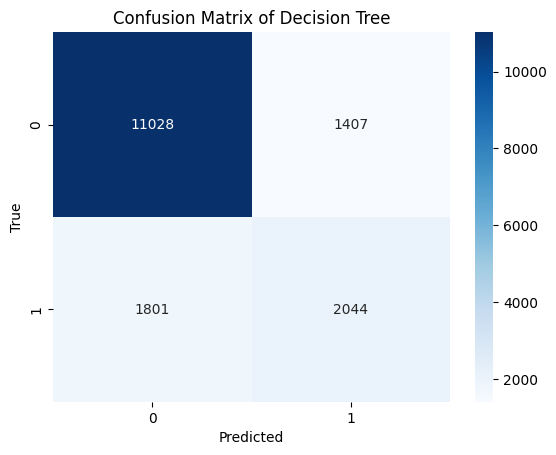

In [37]:
# Plot confusion matrix
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

# DECISION TREE PRUNING

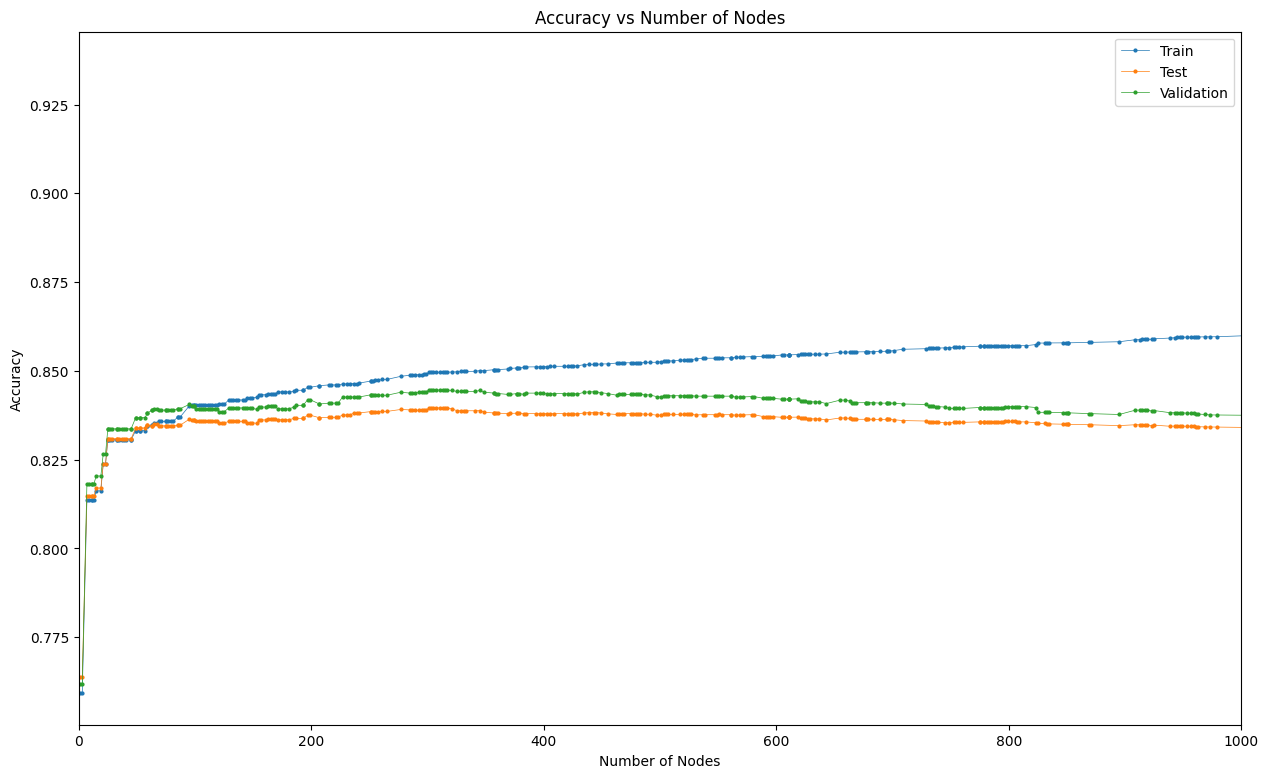

Accuracy after pruning: 83.45208845208846


In [38]:
# Prune the decision tree using reduced error pruning

# Split the testing data into validation and new testing sets
X_val, X_new_test, y_val, y_new_test = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

path = clf1.cost_complexity_pruning_path(X_train1, y_train1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf1 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion='entropy')
    clf1.fit(X_train1, y_train1)
    clfs.append(clf1)

train_nodes = [clf1.tree_.node_count for clf1 in clfs]
train_scores = [clf1.score(X_train1, y_train1) for clf1 in clfs]
test_scores = [clf1.score(X_test1, y_test1) for clf1 in clfs]
val_scores = [clf1.score(X_val, y_val) for clf1 in clfs]

# Plotting the number of nodes vs accuracy
plt.figure(figsize=(15, 9))
plt.plot(train_nodes, train_scores, marker='o', label="Train", linewidth=0.5, markersize=2)
plt.plot(train_nodes, test_scores, marker='o', label="Test", linewidth=0.5, markersize=2)
plt.plot(train_nodes, val_scores, marker='o', label="Validation", linewidth=0.5, markersize=2)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Nodes")
plt.legend()
plt.xlim(0, 1000)
plt.show()

# Find the optimal decision tree based on validation accuracy
optimal_alpha = ccp_alphas[np.argmax(val_scores)]
optimal_clf = clfs[np.argmax(val_scores)]

# Make predictions on the new testing data using the optimal decision tree
y_new_pred = optimal_clf.predict(X_new_test)

# Evaluate the model
pruning_accuracy = metrics.accuracy_score(y_new_test, y_new_pred)
print("Accuracy after pruning:", pruning_accuracy * 100)

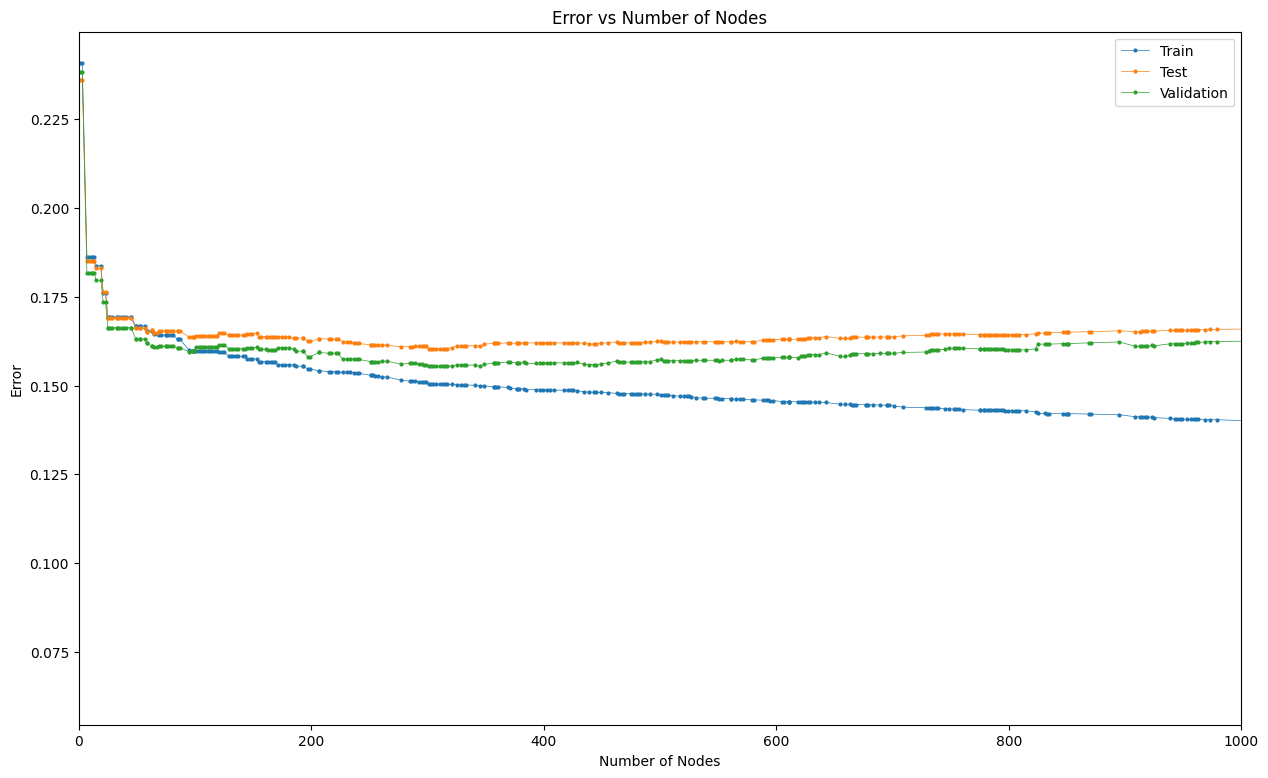

In [39]:
train_errors = [1 - score for score in train_scores]
test_errors = [1 - score for score in test_scores]
val_errors = [1 - score for score in val_scores]

# Plotting the number of nodes vs error
plt.figure(figsize=(15, 9))
plt.plot(train_nodes, train_errors, marker='o', label="Train", linewidth=0.5, markersize=2)
plt.plot(train_nodes, test_errors, marker='o', label="Test", linewidth=0.5, markersize=2)
plt.plot(train_nodes, val_errors, marker='o', label="Validation", linewidth=0.5, markersize=2)
plt.xlabel("Number of Nodes")
plt.ylabel("Error")
plt.title("Error vs Number of Nodes")
plt.legend()
plt.xlim(0, 1000)
plt.show()


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate accuracy, precision, recall, and F1-score
classification_report_result = classification_report(y_new_test, y_new_pred)
print("Classification Report:")
print(classification_report_result)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_new_test, y_new_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Record number of nodes and depths of the pruned decision tree
pruned_tree_nodes = optimal_clf.tree_.node_count
pruned_tree_depth = optimal_clf.tree_.max_depth

print("Number of Nodes in Pruned Decision Tree:", pruned_tree_nodes)
print("Depth of Pruned Decision Tree:", pruned_tree_depth)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6235
           1       0.68      0.55      0.61      1905

    accuracy                           0.83      8140
   macro avg       0.78      0.74      0.75      8140
weighted avg       0.83      0.83      0.83      8140

Confusion Matrix:
[[5740  495]
 [ 852 1053]]
Number of Nodes in Pruned Decision Tree: 317
Depth of Pruned Decision Tree: 14


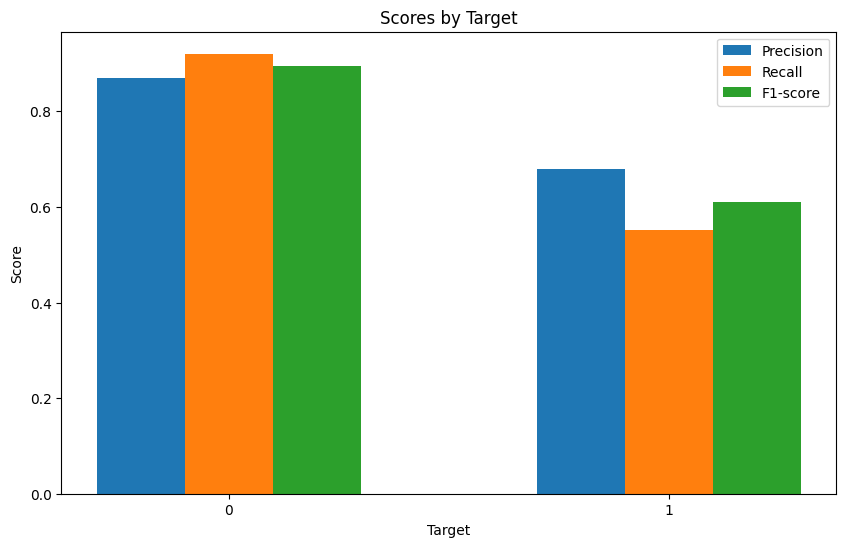

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1-score from the classification report
report_data = classification_report(y_new_test, y_new_pred, output_dict=True)
precision = [report_data[label]['precision'] for label in ['0', '1']]
recall = [report_data[label]['recall'] for label in ['0', '1']]
f1_score = [report_data[label]['f1-score'] for label in ['0', '1']]

# Plot the graph
labels = ['0', '1']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_xlabel('Target')
ax.set_ylabel('Score')
ax.set_title('Scores by Target')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [45]:
features_list = list(df.columns[:-1])
features_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

# Saving Pruned DT with Entropy Criterion

In [46]:
# Export the pruned optimal decision tree to Graphviz format
dot_data = StringIO()
export_graphviz(optimal_clf, out_file=dot_data, feature_names=features_list)

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Generate the SVG representation of the graph
svg_bytes = graph.create_svg()

# Display the SVG graph
SVG(svg_bytes)
svg_content = svg_bytes.decode()

# Save the SVG image to a file
with open('decision_tree2.svg', 'w') as f:
    f.write(svg_content)

# Pruning with max depth reduced error pruning

In [49]:
# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = X ,a ,y ,b

# Create a decision tree classifier
clf1 = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
clf1.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred1 = clf1.predict(X_test1)

# Get the number of nodes in the decision tree
num_nodes1 = clf1.tree_.node_count
depth1 = clf1.get_depth()

x = clf1.get_depth()

train_errors = []
val_errors = []
test_errors = []
num_nodes = []

best_val_error = float('inf')
best_train_error = float('inf')
best_test_error = float('inf')
best_accuracy = 0.0
best_depth = 0
best_num_nodes = 0

for i in range(1, x + 1):
    new_tree = DecisionTreeClassifier(max_depth=i)
    new_tree.fit(X_train1, y_train1)

    train_pred = new_tree.predict(X_train1)
    train_error = 1 - metrics.accuracy_score(y_train1, train_pred)
    train_errors.append(train_error)

    val_pred = new_tree.predict(X_val)
    val_error = 1 - metrics.accuracy_score(y_val, val_pred)
    val_errors.append(val_error)

    test_pred = new_tree.predict(X_test1)
    test_error = 1 - metrics.accuracy_score(y_test1, test_pred)
    test_errors.append(test_error)

    num_nodes.append(new_tree.tree_.node_count)

    if val_error < best_val_error and train_error < best_train_error:
        best_val_error = val_error
        best_train_error = train_error
        best_test_error = test_error
        best_accuracy = metrics.accuracy_score(y_test1, test_pred)
        best_depth = i
        best_num_nodes = new_tree.tree_.node_count

depths = np.arange(1, x + 1)

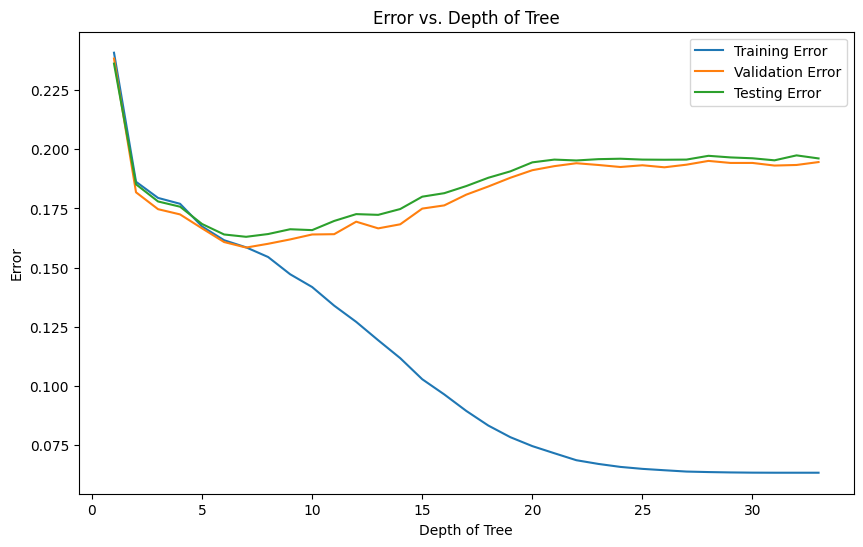

Best Depth: 7
Number of Nodes at Best Depth: 235
Training Error at Best Depth: 0.15856879606879604
Validation Error at Best Depth: 0.15847665847665848
Testing Error at Best Depth: 0.163022113022113
Accuracy at Best Depth: 83.6977886977887


In [50]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, val_errors, label='Validation Error')
plt.plot(depths, test_errors, label='Testing Error')
plt.xlabel('Depth of Tree')
plt.ylabel('Error')
plt.title('Error vs. Depth of Tree')
plt.legend()
plt.show()

print("Best Depth:", best_depth)
print("Number of Nodes at Best Depth:", best_num_nodes)
print("Training Error at Best Depth:", best_train_error)
print("Validation Error at Best Depth:", best_val_error)
print("Testing Error at Best Depth:", best_test_error)
print("Accuracy at Best Depth:", best_accuracy * 100)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate evaluation metrics for the best depth
best_tree = DecisionTreeClassifier(max_depth=best_depth)
best_tree.fit(X_train1, y_train1)

# Predict labels for train, validation, and test sets
train_pred = best_tree.predict(X_train1)
val_pred = best_tree.predict(X_val)
test_pred = best_tree.predict(X_test1)

# Calculate evaluation metrics for train, validation, and test sets
train_accuracy = metrics.accuracy_score(y_train1, train_pred)
val_accuracy = metrics.accuracy_score(y_val, val_pred)
test_accuracy = metrics.accuracy_score(y_test1, test_pred)

train_precision = metrics.precision_score(y_train1, train_pred)
val_precision = metrics.precision_score(y_val, val_pred)
test_precision = metrics.precision_score(y_test1, test_pred)

train_recall = metrics.recall_score(y_train1, train_pred)
val_recall = metrics.recall_score(y_val, val_pred)
test_recall = metrics.recall_score(y_test1, test_pred)

train_f1 = metrics.f1_score(y_train1, train_pred)
val_f1 = metrics.f1_score(y_val, val_pred)
test_f1 = metrics.f1_score(y_test1, test_pred)

# Generate confusion matrices
train_confusion_matrix = confusion_matrix(y_train1, train_pred)
val_confusion_matrix = confusion_matrix(y_val, val_pred)
test_confusion_matrix = confusion_matrix(y_test1, test_pred)

# ... (plotting code)

# Print evaluation metrics and confusion matrices
print("Evaluation Metrics:")
print("Best Depth:", best_depth)
print("Number of Nodes at Best Depth:", best_num_nodes)

print("\nTraining Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nValidation Set:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)
print("Confusion Matrix:")
print(val_confusion_matrix)

print("\nTesting Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)


Evaluation Metrics:
Best Depth: 7
Number of Nodes at Best Depth: 235

Training Set:
Accuracy: 0.841431203931204
Precision: 0.7268259617014066
Recall: 0.5470663265306123
F1-score: 0.6242631540644786
Confusion Matrix:
[[23108  1612]
 [ 3551  4289]]

Validation Set:
Accuracy: 0.8416461916461917
Precision: 0.7237113402061855
Recall: 0.5427835051546391
F1-score: 0.6203240058910162
Confusion Matrix:
[[5798  402]
 [ 887 1053]]

Testing Set:
Accuracy: 0.836916461916462
Precision: 0.7087719298245614
Recall: 0.5253576072821846
F1-score: 0.6034353995519044
Confusion Matrix:
[[11605   830]
 [ 1825  2020]]


# MIXED DATASET TTS

In [58]:
from sklearn.model_selection import train_test_split

# Combine the df and tf DataFrames
combined_df = pd.concat([df, tf])

# Numerical encoding the features
R_enc = LabelEncoder()
R_final = combined_df.apply(LabelEncoder().fit_transform)

# Split the dataset into training and testing sets
X = R_final.iloc[:, :-1]
y = R_final.iloc[:, -1]

# Split the data randomly into training and testing sets with a 67% training and 33% testing split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train2.shape, y_train2.shape)
print("Testing set shape:", X_test2.shape, y_test2.shape)

Training set shape: (32724, 14) (32724,)
Testing set shape: (16118, 14) (16118,)


In [59]:
# 67% training set randomly distributed

# Create a decision tree classifier
clf_2 = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
clf_2.fit(X_train2, y_train2)

# Make predictions on the testing data
y_pred2 = clf_2.predict(X_test2)

# Get the number of nodes in the decision tree
num_nodes2 = clf_2.tree_.node_count
print("Number of nodes in the decision tree:", num_nodes2)

# Get the depth of the decision tree
depth2 = clf_2.get_depth()
print("Depth of the decision tree:", depth2)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy*100)


Number of nodes in the decision tree: 12067
Depth of the decision tree: 32
Accuracy: 80.38218141208586


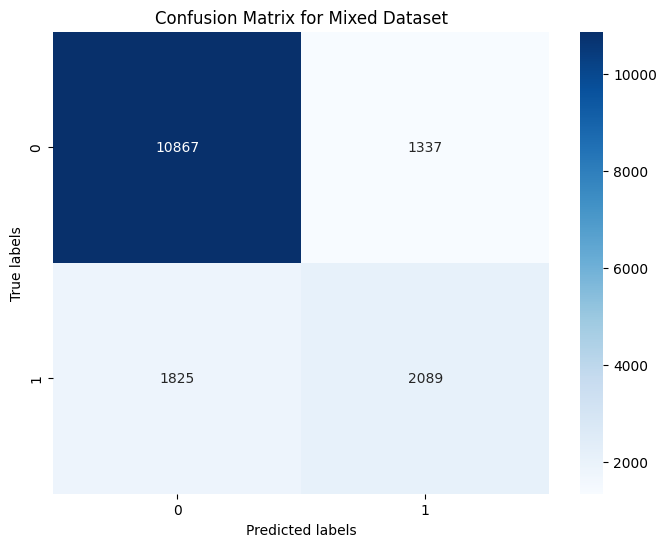

F1 Score: 0.5692098092643052
Accuracy: 80.38218141208586


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

# Calculate the F1 score
f1 = f1_score(y_test2, y_pred2)

# Calculate the accuracy
accuracy = accuracy_score(y_test2, y_pred2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Mixed Dataset')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Print the F1 score and accuracy
print("F1 Score:", f1)
print("Accuracy:", accuracy*100)


# RANDOM FOREST

In [62]:
# Random Forest

# Encode the 'target' column using LabelEncoder
R_enc = LabelEncoder()
R_final = result.apply(LabelEncoder().fit_transform)

# Split the dataset into training and testing sets
X, y = R_final.iloc[:32560, :-1], R_final.iloc[:32560, -1]
a, b = R_final.iloc[32561:48841, :-1], R_final.iloc[32561:48841, -1]
X_train, X_test, y_train, y_test = X, a, y, b

# Create a Random Forest classifier
Random_forest_classification = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
Random_forest_classification.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = Random_forest_classification.predict(X_test)

# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 82.54299754299754


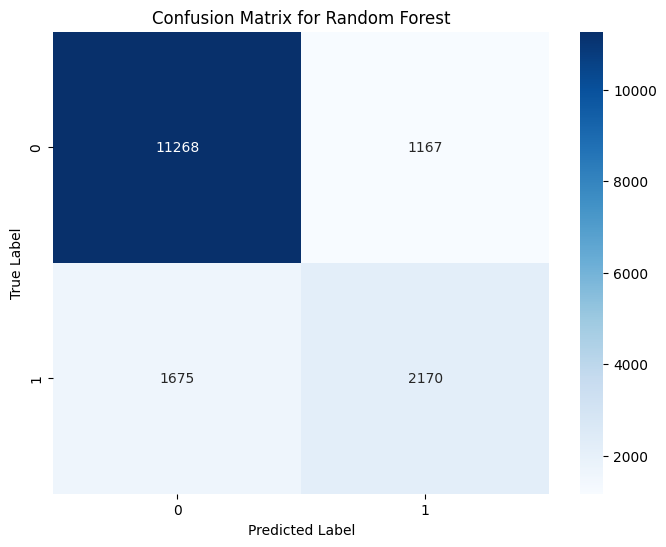

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ...

# Make predictions on the testing data
y_pred = Random_forest_classification.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Custom Reduced Error Pruning without library (Not within device's limitation)

In [ ]:

# Initial error rates
y_train_pred = clf1.predict(X_train1)
training_error = 1 - metrics.accuracy_score(y_train1, y_train_pred)
y_val_pred = clf1.predict(X_val)
validation_error = 1 - metrics.accuracy_score(y_val, y_val_pred)
y_test_pred = clf1.predict(X_test1)
testing_error = 1 - metrics.accuracy_score(y_test1, y_test_pred)

# Append initial values to the lists
num_nodes_list = [clf1.tree_.node_count]
training_error_list = [training_error]
validation_error_list = [validation_error]
testing_error_list = [testing_error]

# Perform Reduced Error Pruning
while True:
    best_clf = None
    best_validation_error = validation_error

    # Iterate over each node for pruning
    for node in range(clf1.tree_.node_count):
        if clf1.tree_.children_left[node] != clf1.tree_.children_right[node]:
            # Copy the original decision tree classifier
            pruned_clf = copy.deepcopy(clf1)

            # Prune the subtree at the current node
            pruned_clf.tree_.children_left[node] = pruned_clf.tree_.children_right[node]

            # Evaluate the pruned decision tree on the validation data
            y_val_pred = pruned_clf.predict(X_val)
            pruned_validation_error = 1 - metrics.accuracy_score(y_val, y_val_pred)

            # Check if pruning improves the validation error
            if pruned_validation_error <= best_validation_error:
                best_validation_error = pruned_validation_error
                best_clf = pruned_clf

    if best_clf is not None:
        clf1 = best_clf

        # Update error rates
        y_train_pred = clf1.predict(X_train1)
        training_error = 1 - metrics.accuracy_score(y_train1, y_train_pred)
        y_val_pred = clf1.predict(X_val)
        validation_error = 1 - metrics.accuracy_score(y_val, y_val_pred)
        y_test_pred = clf1.predict(X_test1)
        testing_error = 1 - metrics.accuracy_score(y_test1, y_test_pred)

        # Append values to the lists
        num_nodes_list.append(clf1.tree_.node_count)
        training_error_list.append(training_error)
        validation_error_list.append(validation_error)
        testing_error_list.append(testing_error)
    else:
        break

# Plotting the graph
plt.plot(num_nodes_list, training_error_list, label='Training Error')
plt.plot(num_nodes_list, validation_error_list, label='Validation Error')
plt.plot(num_nodes_list, testing_error_list, label='Testing Error')
plt.xlabel('Number of Nodes')
plt.ylabel('Error Rate')
plt.title('Number of Nodes vs Error')
plt.legend()
plt.show()